# 1. Machine Learning Pipeline - Home Credit Default Risk: Data preparation and understanding

### Imports 

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Preparation and Understanding 

In [2]:
ROOTH_PATH = os.getcwd()
RAW_DATA_PATH = os.path.join(ROOTH_PATH, "data/raw")
TARGET = 'TARGET'

In [3]:
train_set = pd.read_csv(os.path.join(RAW_DATA_PATH, "application_train.csv"))
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


#### a. The target variable

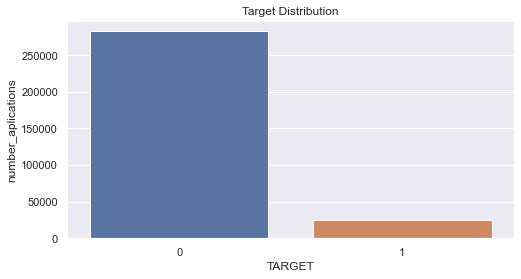

% Not repaid loan (1): 8.07
% Repaid loan (0): 91.93


In [4]:
df_aux = train_set.groupby(TARGET).agg({'SK_ID_CURR': 'count'}).reset_index().rename(columns={'SK_ID_CURR': 'number_aplications'})
sns.set(rc={'figure.figsize':(8, 4)})
sns.barplot(data=df_aux, x=TARGET, y="number_aplications").set_title("Target Distribution")
plt.show()
print("% Not repaid loan (1): {}".format(round(df_aux[df_aux[TARGET]==1]["number_aplications"].values[0]/df_aux["number_aplications"].sum(), 4)*100))
print("% Repaid loan (0): {}".format(round(df_aux[df_aux[TARGET]==0]["number_aplications"].values[0]/df_aux["number_aplications"].sum(), 4)*100))


#### b. Variables type

In [5]:
CATEGORICAL_VARS = [var for var in train_set.columns if train_set[var].dtype=='O']
print("Number categorical variables: {}".format(len(CATEGORICAL_VARS)))

NUMERICAL_VARS = [var for var in train_set.columns if var not in CATEGORICAL_VARS and var!=TARGET and var!='SK_ID_CURR']
print("Number numerical variables: {}".format(len(NUMERICAL_VARS)))

Number categorical variables: 16
Number numerical variables: 104


### c. Missing Values

Porcentage of variables with missing data: 54.92


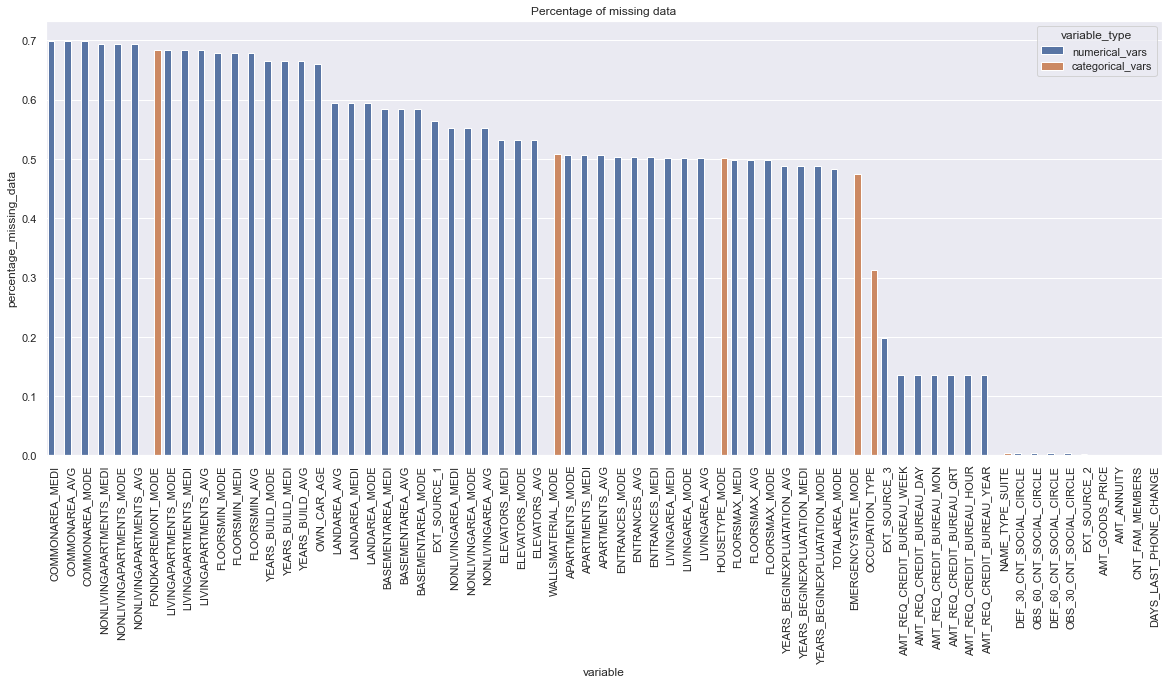

In [6]:
vars_with_na = [var for var in train_set.columns if train_set[var].isnull().sum()>0]
data_vars_with_na = train_set[vars_with_na].isnull().mean().sort_values(ascending=False)
data_vars_with_na = pd.DataFrame(data_vars_with_na).reset_index().rename(columns={"index": "variable", 0: "percentage_missing_data"})
data_vars_with_na["variable_type"] = np.where(data_vars_with_na["variable"].isin(CATEGORICAL_VARS), "categorical_vars", "numerical_vars")
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.barplot(
    data=data_vars_with_na, 
    x="variable", 
    y="percentage_missing_data",
    hue="variable_type"
).set_title("Percentage of missing data")

print("Porcentage of variables with missing data: {}".format(round(len(vars_with_na)/len(train_set.columns), 4)*100))

#### d. Numerical variables

##### Year Birth
From the distribution of age, We can infer that as the client gets older, they tend to repay their loans on time more often.

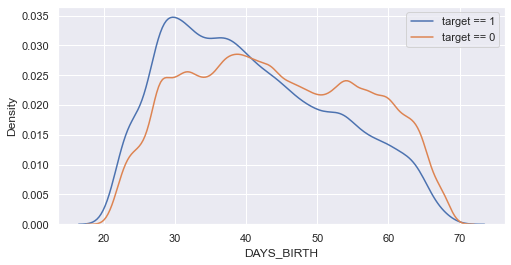

In [7]:
plt.figure(figsize = (8, 4))
sns.kdeplot(train_set.loc[train_set['TARGET'] == 1, 'DAYS_BIRTH'] / - 365, label = 'target == 1')
sns.kdeplot(train_set.loc[train_set['TARGET'] == 0, 'DAYS_BIRTH'] / - 365, label = 'target == 0')
plt.legend()

##### EXT_SOURCE

The 3 variables EXT_SOURCE_1, EXT_SOURCE_2 and EXT_SOURCE_3 show a greater difference between the values of the target. According to the documentation, these features represent a "normalized score from an external data source."

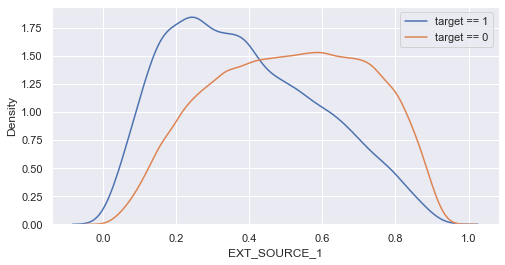

In [8]:
plt.figure(figsize = (8, 4))
sns.kdeplot(train_set.loc[train_set['TARGET'] == 1, 'EXT_SOURCE_1'], label = 'target == 1')
sns.kdeplot(train_set.loc[train_set['TARGET'] == 0, 'EXT_SOURCE_1'], label = 'target == 0')
plt.legend()

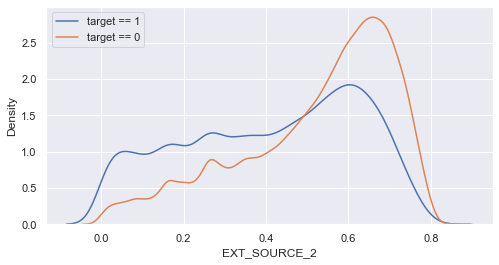

In [9]:
plt.figure(figsize = (8, 4))
sns.kdeplot(train_set.loc[train_set['TARGET'] == 1, 'EXT_SOURCE_2'], label = 'target == 1')
sns.kdeplot(train_set.loc[train_set['TARGET'] == 0, 'EXT_SOURCE_2'], label = 'target == 0')
plt.legend()

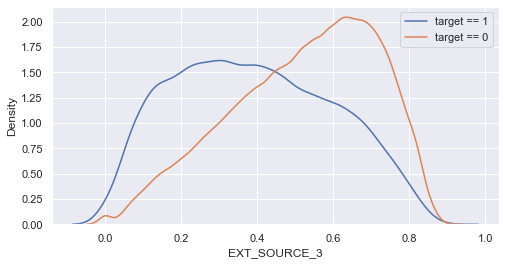

In [10]:
plt.figure(figsize = (8, 4))
sns.kdeplot(train_set.loc[train_set['TARGET'] == 1, 'EXT_SOURCE_3'], label = 'target == 1')
sns.kdeplot(train_set.loc[train_set['TARGET'] == 0, 'EXT_SOURCE_3'], label = 'target == 0')
plt.legend()

#### e. Categorical variables

##### Cardinality

Number of categorical variables: 16


Text(0.5, 1.0, 'Cardinality - Categorical variables')

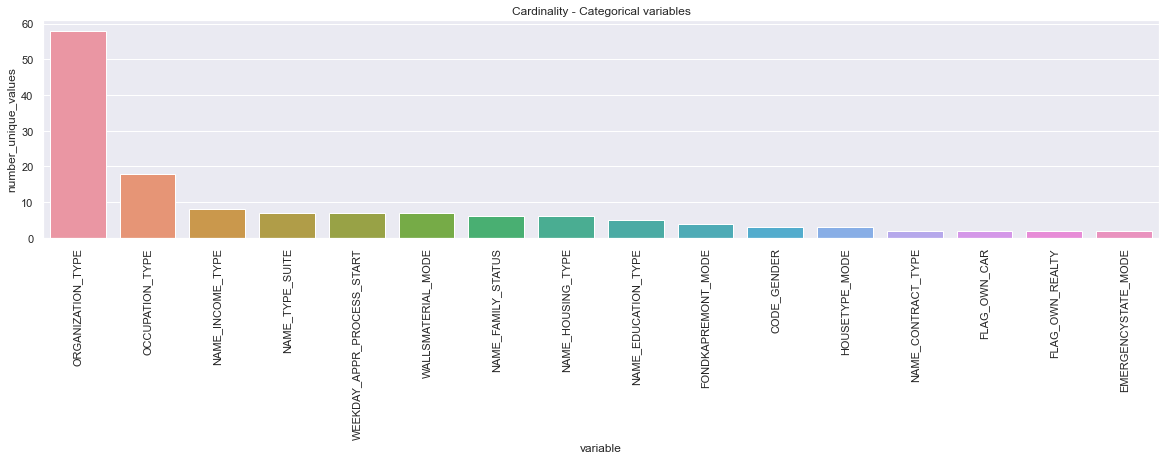

In [11]:
print('Number of categorical variables: {}'.format(len(CATEGORICAL_VARS)))
df_aux = pd.DataFrame(train_set[CATEGORICAL_VARS].nunique().sort_values(ascending=False)).reset_index().rename(columns={'index': 'variable', 0: 'number_unique_values'})
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.barplot(data=df_aux, x='variable', y='number_unique_values').set_title("Cardinality - Categorical variables")

#### Distribution

Text(0.5, 1.0, 'CODE_GENDER - Feature distribution')

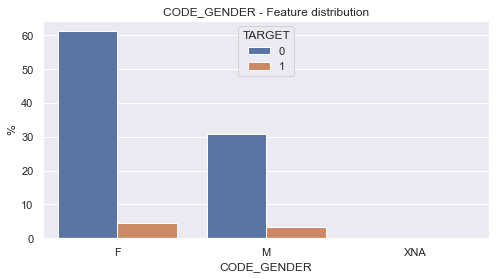

In [12]:
feature = 'CODE_GENDER'
df_aux = train_set[['SK_ID_CURR', feature, TARGET]].groupby([feature, TARGET]).count().reset_index()
df_aux['%'] = df_aux['SK_ID_CURR']/df_aux['SK_ID_CURR'].sum()*100

sns.barplot(
    data=df_aux, 
    x=feature, 
    y="%",
    hue=TARGET
).set_title(f"{feature} - Feature distribution")

Text(0.5, 1.0, 'NAME_EDUCATION_TYPE - Feature distribution')

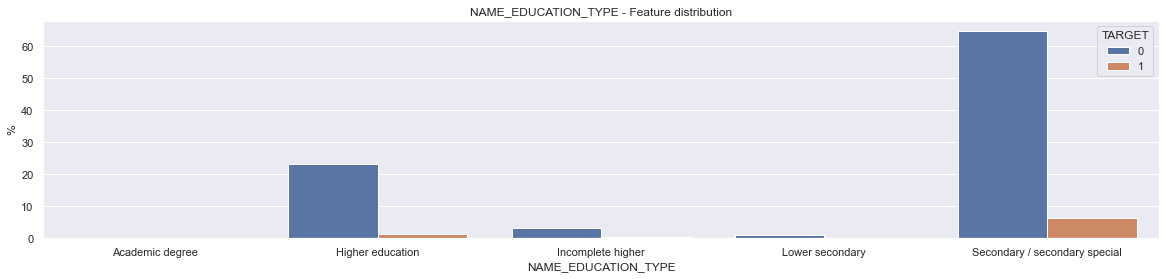

In [13]:
feature = 'NAME_EDUCATION_TYPE'
df_aux = train_set[['SK_ID_CURR', feature, TARGET]].groupby([feature, TARGET]).count().reset_index()
df_aux['%'] = df_aux['SK_ID_CURR']/df_aux['SK_ID_CURR'].sum()*100
plt.figure(figsize=(20,4))
sns.barplot(
    data=df_aux, 
    x=feature, 
    y="%",
    hue=TARGET
).set_title(f"{feature} - Feature distribution")

Text(0.5, 1.0, 'OCCUPATION_TYPE - Feature distribution')

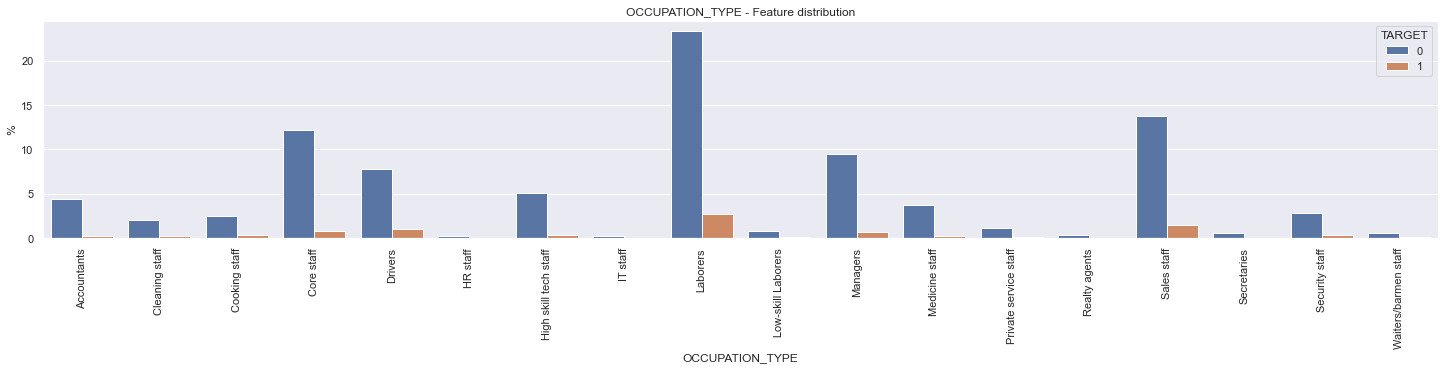

In [14]:
feature = 'OCCUPATION_TYPE'
df_aux = train_set[['SK_ID_CURR', feature, TARGET]].groupby([feature, TARGET]).count().reset_index()
df_aux['%'] = df_aux['SK_ID_CURR']/df_aux['SK_ID_CURR'].sum()*100
plt.figure(figsize=(25,4))
plt.xticks(rotation=90)
sns.barplot(
    data=df_aux, 
    x=feature, 
    y="%",
    hue=TARGET
).set_title(f"{feature} - Feature distribution")

Text(0.5, 1.0, 'NAME_FAMILY_STATUS - Feature distribution')

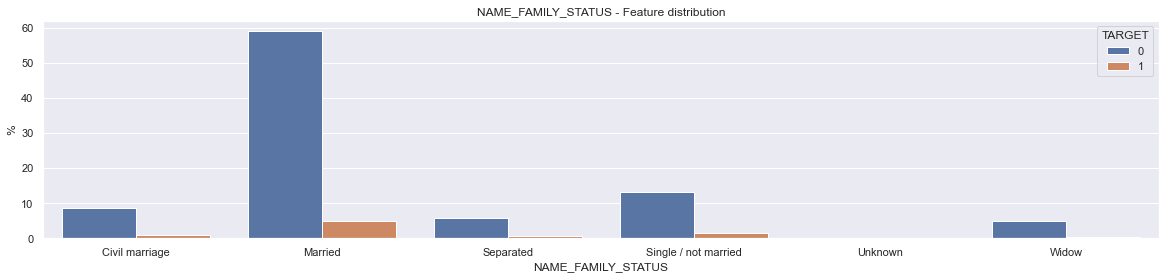

In [15]:
feature = 'NAME_FAMILY_STATUS'
df_aux = train_set[['SK_ID_CURR', feature, TARGET]].groupby([feature, TARGET]).count().reset_index()
df_aux['%'] = df_aux['SK_ID_CURR']/df_aux['SK_ID_CURR'].sum()*100
plt.figure(figsize=(20,4))
sns.barplot(
    data=df_aux, 
    x=feature, 
    y="%",
    hue=TARGET
).set_title(f"{feature} - Feature distribution")